In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [139]:
df = pd.read_csv('test_2020.csv')
df.head()

/home/andrey/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249

,idn,a02_trad,a03_sum,a04_cosm,a1_1,a10_1,a11a_1,a11b_1,a11c_1,a12_1,...,var00240,var00241,var00242,var00243,var00244,var00245,var00246,var00247,var00248,VAR00001
0,1,Bushmen,60,36,0,0,0,0,0,1,...,,,,,,,,,,
1,2,Khoikhoi,71,22,0,0,0,0,0,0,...,,,,,,,,,,
2,3,Xhosa,64,19,0,0,0,0,0,0,...,,,,,,,,,,
3,4,"Zulu,Swasi",55,19,0,0,0,0,0,1,...,,,,,,,,,,
4,5,"Sotho, Tswana",75,19,0,0,0,0,0,1,...,,,,,,,,,,


### Чистка

In [140]:
df = df[df.columns[~pd.Series(df.columns).str.startswith('var')]]

In [141]:
df = df[df.idn != 1000]

In [142]:
df = df.iloc[:,:-1]

In [143]:
df.head()

,idn,a02_trad,a03_sum,a04_cosm,a1_1,a10_1,a11a_1,a11b_1,a11c_1,a12_1,...,n30_13,n31_13,n32_13,n33_13,n4_13,n5_13,n6_13,n7_13,n8_13,n9_13
0,1,Bushmen,60,36,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Khoikhoi,71,22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Xhosa,64,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,"Zulu,Swasi",55,19,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,"Sotho, Tswana",75,19,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Проверим, сколько мифов с одинаковыми значениями

In [134]:
df.duplicated(subset=df.columns[2:], keep = False).sum()

0

In [230]:
df.duplicated(subset=df.columns[4:], keep = False).sum()

0

In [231]:
df.shape

(979, 2682)

То есть все строки в чем-то между собой различаются

In [182]:
df = df.fillna('0')
for i in df.iloc[:, 2:].columns:
    print(i)
    df.loc[:,i] = df.loc[:,i].astype(int)

a03_sum
a04_cosm
a1_1
a10_1
a11a_1
a11b_1
a11c_1
a12_1
a12a_1
a12b_1
a12c_1
a12d_1
a12e_1
a12f_1
a12g_1
a13a_1
a13a1_1
a13b_1
a14_1
a15_1
a16_1
a17_1
a18_1
a19a_1
a19b_1
a1a_1_7a
a20_1
a21_1
a22_1
a22a_1
a22b_1
a22c_1
a22d_2
a23_1
a23a_11
a23b_11
a23c_11
a24_1
a24a_3
a25_3
a26_1
a27_1
a29_1
a29a_10
a29b_1
a2a_1
a2b_1
a2b1_1
a2c_1
a2c1_1
a2d_1
a3_1
a30_1
a31_2
a31a_5
a32_2
a32a_2
a32b_2
a32b1_2
a32c_2
a32c1_2
a32d_2
a32d1_2
a32d2_2
a32dd_2
a32e_2
a32f_2
a32g_2
a32h_2
a32i_2
a32j_2
a32k_2
a33_2
a34_2
a35_2
a35a_2
a35b_2
a35c_2
a36_4_1
a36a_4_1
a37_1
a37a_7a
a37b_7a
a38_1
a38a_5
a38b_7a
a38c_10
a38d_10
a39_1
a39a_1
a4_1
a40_5
a41_1
a42_1
a43_3
a43a_10
a44_2
a45_2
a46_1
a4a_1
a4b_1
a5_1
a5a_1
a6_1
a7_1
a7a_1
a8_1
a8a_1
a9_1
b1_3
b10_3
b100_3
b101_7b
b102_3
b103_7b
b104_7a
b104a_11
b105_7a
b106_7a
b107_7a
b108_3
b109_7a
b109a_7a
b110_3
b110a_3
b111_7a
b112_7a
b113_5
b114_7a
b115_7b
b115a_7b
b116_4_6a
b116a_4_6a
b116b_4_6a
b116c_4_6a
b117_7a_11
b118_7a
b119_7a
b11a_3
b13a_10
b14_3
b15_3
b16a

k100a_10
k100b_10
k100c_10
k100d_10
k100e_10
k100f_10
k100f1_10
k100g_10
k101_10
k101a_10
k101b_10
k101c_10
k102_10
k102a_10
k102a1_10
k102a2_10
k102a3_10
k102a4_10
k102b_10
k103_10
k103a_10
k104_10
k105_10
k106_10
k107_10
k107a_10
k107a1_10
k107b_10
k107c_10
k107d_10
k107e_10
k108_10
k108a_10
k109_10
k10a_10
k10b_10
k10c_10
k10d_10
k10e_10
k10f_7a
k10g_10
k10h_10
k10i_10
k110_10
k111_10
k112_10
k113_10
k113a_10
k114_10
k115_10
k116_10
k116a_10
k116b_10
k117_10
k117a_10
k117b_10
k117c_10
k118_10
k119_10
k119a_10
k119b_11
k11a_7a
k11b_7b_6a
k12_10
k120_10
k120a_10
k120a1_10
k120a2_10
k120a3_10
k120a4_10
k121_10
k122_10
k123_10
k123a_10
k123b_10
k124_10
k125_10
k126_10
k127_10
k127a_10
k128_10
k128a_10
k128b_10
k129_10
k129a_10
k12a_10
k130_10
k130a_10
k131_10
k131a_10
k131b_10
k132_10
k132a_10
k133_10
k134_10
k135_10
k136_10
k136a_10
k136b_10
k136c_10
k136d_10
k137_10
k138_10
k139_10
k13a_2
k13b_10
k13c_10
k13d_2
k14_100
k140_10
k141_10
k142_10
k143_10
k144_10
k145_10
k146_10
k147_10
k1

m39a6_11
m39a6a_10
m39a6b_10
m39a6c_10
m39a6d_10
m39a6f_10
m39a6g_11
m39a6h_11
m39a6i_11
m39a7_11
m39b_11
m39b1_11
m39c_11
m39d_11
m39e_11
m39e1_11
m39e1a_11
m39e2_11
m39f_11
m39g_11
m39h_11
m39i_11
m3a_11
m4_10
m40_11
m41_11
m42_11
m42a_11
m42b_11
m42c_11
m43_10
m44a_10
m44b_10
m44c_10
m45_11
m45a_11
m46a_11
m46b_11
m46c_11
m46d_11
m47_10
m48_11
m49_10
m49a_10
m5_11
m50_11
m51_11
m52_11
m53_11
m53a_11
m53b_11
m53c_11
m53d_11
m53e_11
m53f_11
m54_11
m55_11
m56a_11
m56b_11
m56c_11
m56d_11
m57a_8
m57b_8
m57c_11
m57d_11
m57d1_9
m57d2_9
m57d3_9
m57d4_9
m58_10
m59_11
m59a_11
m5a_11
m6_10
m60_10
m60a_10
m60a1_10
m60a2_10
m60b_11
m61a_11
m61a1_11
m61a2_11
m61a3_11
m62b_11
m62c_11
m62d_11
m62e_11
m62f_11
m63_10
m64_11
m65_11
m65a_11
m65b_11
m66_11
m67_11
m68_11
m69_11
m7_10
m70_10
m70a_10
m71_11
m72_10
m73_11
m74_11
m74a_11
m74aa_11
m74ab_11
m74b_11
m74c_11
m75a_11
m75b_10
m75b1_100
m75b1a_100
m75b2_10
m75b3_10
m75c_10
m75d_10
m76_10
m77_11
m78_9_112
m78a_9_112
m78b_9_112
m78c_112
m78d_9_112
m7

In [181]:
# df.e31a2_11 = df.e31a2_11.str.replace(" ",'0')
# df.k136d_10 = df.k136d_10.str.replace(" ",'0')
# df.k72a_10 = df.k72a_10.str.replace(" ",'0')
# df.L72i_10 = df.L72i_10.str.replace(" ",'0')
# df.m114b1_11 = df.m114b1_11.str.replace(" ",'0')
# df.m39a5a2_11 = df.m39a5a2_11.str.replace(" ",'0')


### W2V

In [232]:
import numpy as np

class word2vec_model():
    #settings
    def __init__(self, window_size, embedding_size, epochs, learning_rate):
        self.window = window_size
        self.embedding_size = embedding_size
        self.epochs = epochs
        self.lr = learning_rate

    #text to one-hot representation
    def prepare_data(self, df):
        counts = dict()
#         tokens = [word.lower() for word in data.split()]
#         print('tokens', tokens)
#         for word in tokens:
#             if word in counts:
#                 counts[word] += 1
#             else:
#                 counts[word] = 1
        self.vocab_size = df.drop(columns=['idn','a02_trad']).iloc[:,:15].shape[1]#num of uniq rows 
        self.word_index = dict((str(row[2:].values), row.idn) for index, row in df.iterrows())#index of myth: feature
        self.index_word = dict((str(row[2:].values), row.idn) for index, row in df.iterrows())#feature : index of myth
#         print(self.index_word)      
        training_data = []
        df = df.drop(columns=['idn','a02_trad']).iloc[:,:15]
        for i, row in df.iterrows():
            w_target = df.iloc[i].values.tolist()
            w_context = []
            for j in range(i - self.window, i + self.window+1):
                if j != i and j <= df.shape[0]-1 and j >= 0:
#                     w_context += [df.iloc[j].values.tolist()]
                    w_context.append(df.iloc[j].values.tolist())
            training_data.append([w_target, w_context])
#             training_data += list(w_target)
#             training_data += list(w_context)
        
        print('train data', len(training_data))
        return np.array(training_data)
    
    #single word to one-hot vector of vocab_size
#     def get_onehot(self, word):
#         word_vec = [0 for i in range(0, self.vocab_size)]
#         word_index = self.word_index[word]
#         word_vec[word_index] = 1
#         return word_vec
    
    #initialize weights and train for n epochs
    def train(self, data):
        training_data = self.prepare_data(data)
        history = []
        self.w1 = np.random.rand(self.vocab_size,self.embedding_size)
        self.w2 = np.random.rand(self.embedding_size,self.vocab_size) 
        for i in range(self.epochs):
            self.loss = 0
            for w_t, w_c in training_data:
                print(w_t)
                print(w_c)
                y_pred, h, u = self.forward_pass(w_t)            
                error = np.sum([np.subtract(y_pred, word) for word in w_c], axis=0)
                self.backward_pass(error, h, w_t)
                self.loss += -np.sum([u[word.index(1)] for word in w_c]) + len(w_c) * np.log(np.sum(np.exp(u)))
            history.append(self.loss)
            #print('epoch: %d, loss: %.5f' % (i,self.loss))
        return history
    
    #calculate hidden layer values, weights and outupts
    def forward_pass(self, x):
        print(self.w1.shape, len(x))
        h = np.dot(self.w1.T, x)
        u = np.dot(self.w2.T, h)
        y_c = self.softmax(u)
        return y_c, h, u
    
    #backpropagation for weight updating
    def backward_pass(self, e, h, x):
        dl_dw2 = np.outer(h, e)
        dl_dw1 = np.outer(x, np.dot(self.w2, e.T))
        self.w1 = self.w1 - (self.lr * dl_dw1)
        self.w2 = self.w2 - (self.lr * dl_dw2)
    
    #softmax for regression
    def softmax(self, x):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis=0)
    
    #get single embedding for a word
    def get_vec(self, word):
        w_index = self.word_index[word]
        v_w = self.w1[w_index]
        return v_w
    
    #get embedding dictionary
    def get_vec_dict(self):
        return dict((self.index_word[i], emb) for i, emb in enumerate(self.w1))
    
def train(data):
    model = word2vec_model(window_size=6, embedding_size=10, epochs=100, learning_rate=0.01)
    model.train(data)
    return model.get_vec_dict()

In [233]:
# doc = "After the deduction of the costs of investing, " \
#       "beating the stock market is a loser's game."

model = word2vec_model(window_size=3, embedding_size=10, epochs=100, learning_rate=0.01)
model.train(df)

len(model.w1)

train data 979
[60, 36, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[[71, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [64, 19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [55, 19, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]]
(15, 10) 15


ValueError: 1 is not in list

Идея - взять тот вектор, что у нас уже есть

Проблема - нет охе, из-за этого лосс не вычисляется

Решение - перевести числа в строки и запустить охе?

Решение2 - хэшинг трик на числах?

### PCA

In [148]:
df

,idn,a02_trad,a03_sum,a04_cosm,a1_1,a10_1,a11a_1,a11b_1,a11c_1,a12_1,...,n30_13,n31_13,n32_13,n33_13,n4_13,n5_13,n6_13,n7_13,n8_13,n9_13
0,1,Bushmen,60,36,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Khoikhoi,71,22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Xhosa,64,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,"Zulu,Swasi",55,19,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,"Sotho, Tswana",75,19,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,6,"Tonga, Ndebele",66,22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Shona,96,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,"Bemba,Kaonde,Lamba",85,48,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,"Tsonga,Soli,Sala,Lenje",46,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Ila,39,21,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


x = df.iloc[:, 2:].astype(int).values

x = StandardScaler().fit_transform(x)


pca = PCA(n_components=0.9)
x_pca = pca.fit_transform(x)

x_pca.shape



/home/andrey/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(979, 467)

### SVD

In [198]:
from numpy.linalg import svd

n = 20 # Singular Values
U, s, V = svd(x)
Sig = np.mat(np.eye(n)*s[:n])
newdata = U[:,:n]

In [202]:
newdata

array([[-0.01199715,  0.00237224, -0.00793557, ..., -0.00014636,
         0.00969182, -0.0070507 ],
       [-0.00689649,  0.00073118, -0.01727656, ...,  0.00382099,
        -0.00477846,  0.00585159],
       [-0.00608265, -0.00096167, -0.02132256, ..., -0.01418354,
        -0.00389563,  0.00292081],
       ...,
       [-0.01401816, -0.00671903,  0.00454988, ..., -0.01145967,
         0.02832198, -0.00885698],
       [-0.01447714, -0.00286865, -0.01014804, ...,  0.00373847,
        -0.00435882, -0.0058025 ],
       [-0.01526478, -0.00491349, -0.006438  , ...,  0.00596307,
         0.00600763, -0.01028074]])

### TSNE

In [209]:
from sklearn.manifold import TSNE

X_tsne = TSNE(learning_rate=100,).fit_transform(x)

In [210]:
X_tsne

array([[ 1.0075291 ,  3.282489  ],
       [-1.0572484 ,  4.519082  ],
       [-6.085917  ,  3.2727635 ],
       ...,
       [ 4.089355  , -0.35719106],
       [ 0.51225984, 15.88546   ],
       [ 0.5151055 , 15.9360895 ]], dtype=float32)

### UMAP

In [220]:
!pip install umap-learn

Processing /home/andrey/.cache/pip/wheels/0c/f0/0f/8a9ca1e4d229be3a21e1afe483acfd7ccb93e9a65cf752b446/umap_learn-0.4.1-cp36-none-any.whl
  Using cached https://files.pythonhosted.org/packages/49/74/46406b1f1439401e0cf02cfe6dff65e7fe72ac11e05fb4f63461368784fe/tbb-2020.0.133-py2.py3-none-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/ba/49/61522f34b1333aa4e9aa02005dc0774d25bd234400dff718b16615d6a744/numba-0.48.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/ad/bb/60d4033d56c9da36490af19caa6c794b72b8aef6f792fdfa8cb95d11e419/llvmlite-0.31.0-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: llvmlite 0.23.1
ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import umap

ModuleNotFoundError: No module named 'umap'

### Косинусная близость

In [241]:
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(x)
print('pairwise dense output:\n {}\n'.format(similarities))
similarities.shape

pairwise dense output:
 [[ 1.          0.17136662  0.02951354 ...  0.05859028  0.0083648
   0.07768672]
 [ 0.17136662  1.          0.19346085 ...  0.02893039  0.00414603
   0.08573555]
 [ 0.02951354  0.19346085  1.         ...  0.01444002 -0.00201096
   0.0039389 ]
 ...
 [ 0.05859028  0.02893039  0.01444002 ...  1.          0.26269731
   0.22642687]
 [ 0.0083648   0.00414603 -0.00201096 ...  0.26269731  1.
   0.43092429]
 [ 0.07768672  0.08573555  0.0039389  ...  0.22642687  0.43092429
   1.        ]]



(979, 979)

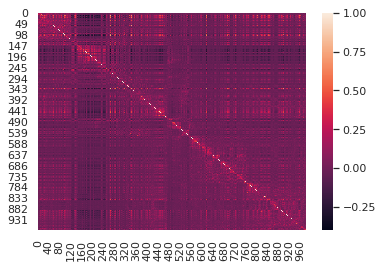

In [242]:
import seaborn as sns; sns.set()

ax = sns.heatmap(similarities)